<h1>OBJECT DETECTION USING CIFAR10 DATASET</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# To convert to categorical data
from tensorflow.keras.utils import to_categorical
#libraries for building model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout,Flatten
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck

Text(0.5, 1.0, 'Label: [3]')

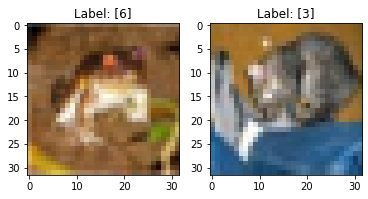

In [5]:
plt.subplot(121)
plt.imshow(X_train[0])
plt.title("Label: {}".format(y_train[0]))
plt.subplot(122)
plt.imshow(X_test[0])
plt.title("Label: {}".format(y_test[0]))

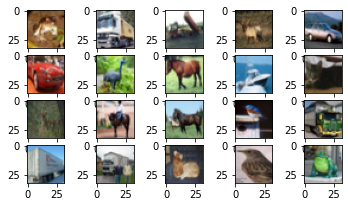

In [6]:
for i in range(20):
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
X_train = X_train/255
X_test = X_test/255
# print(X_train)

<h2>Model Training</h2>

In [8]:
model4=Sequential()
#adding the first Convolution layer
model4.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
#adding Max pooling layer
model4.add(MaxPool2D(2,2))
#adding dropout
model4.add(Dropout(0.2))
#adding another Convolution layer
model4.add(Conv2D(64,(3,3),activation='relu'))
model4.add(MaxPool2D(2,2))
#adding dropout
model4.add(Dropout(0.2))
model4.add(Flatten())
#adding dense layer
model4.add(Dense(216,activation='relu'))
#adding dropout
model4.add(Dropout(0.2))
#adding output layer
model4.add(Dense(10,activation='softmax'))
model4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model4.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5074 - accuracy: 0.4518
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1739 - accuracy: 0.5827
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.0455 - accuracy: 0.6318
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9661 - accuracy: 0.6604
Epoch 5/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9003 - accuracy: 0.6813
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8514 - accuracy: 0.7033
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8058 - accuracy: 0.7163
Epoch 8/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7650 - accuracy: 0.7310
Epoch 9/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7336 - accuracy: 0.7413
Epoch 10/10
1563/1563 [==============================] - 71s 46m

In [9]:
model4.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.8332 - accuracy: 0.7165


[0.8331962823867798, 0.7164999842643738]

In [10]:
pred=model4.predict(X_test)
print(pred[0])
print('Index: ',np.argmax(pred[0]))

[0.00326335 0.00468294 0.01253855 0.5686414  0.00204549 0.38690263
 0.00303027 0.00213524 0.00767918 0.00908092]
Index:  3


In [11]:
model4.save('cifarOD.h5')

In [12]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [13]:
img = load_image('cat.4019.jpg')
result = model4.predict(img)
print(result[0])
print('Index: ',np.argmax(result[0]))

[1.3367897e-04 3.3125046e-04 1.3715659e-02 5.1967132e-01 2.2358481e-02
 9.7607203e-02 6.9230916e-03 2.1121407e-02 1.0475256e-04 3.1803313e-01]
Index:  3


<h2>Prediction</h2>

Enter image name: cat.4019.jpg
Cat


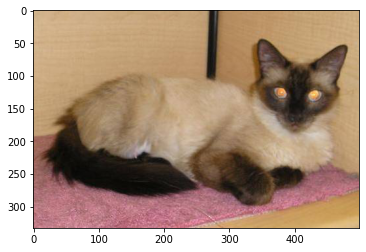

In [16]:
input_image = input("Enter image name: ")
img = load_image(input_image)
result = model4.predict(img)

image1 = plt.imread(input_image)
plt.imshow(image1)

# 0: airplane 1: automobile 2: bird 3: cat 4: deer 5: dog 6: frog 7: horse 8: ship 9: truck
if np.argmax(result[0]) == 0:
  print("Airplane")
elif np.argmax(result[0]) == 1:
  print("Automobile")
elif np.argmax(result[0]) == 2:
  print("Bird")
elif np.argmax(result[0]) == 3:
  print("Cat")
elif np.argmax(result[0]) == 4:
  print("Deer")
elif np.argmax(result[0]) == 5:
  print("Dog")
elif np.argmax(result[0]) == 6:
  print("Frog")
elif np.argmax(result[0]) == 7:
  print("Horse")
elif np.argmax(result[0]) == 8:
  print("Ship")
elif np.argmax(result[0]) == 9:
  print("Truck")